<a href="https://colab.research.google.com/github/ioan-hedea/deepLearning4005/blob/main/Assignment_7(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning - Assignment 7**

*These lab assignments are new in the Machine and Deep Learning course. We'd like to hear what you think!*

*Please post any feedback you have on Brightspace. Thanks!*

---

## Introduction - Complexity in Machine Learning

In this assignment, you will learn about the support vector classifier and how to kernelize a nearest mean classifier. The support vector classifier is a powerful tool for classification tasks, and it is based on the idea of finding the hyperplane that maximizes the margin between the classes. The kernelized nearest mean classifier is a simple classifier that can be used to classify data points based on their distance to the mean of each class.

**Prerequisites:**
* Basic working knowledge of multivariate statistics and linear algebra
* Basic knowledge of Python and Numpy. Recommended tutorial for Python and Numpy [here](https://cs231n.github.io/python-numpy-tutorial/).

**Learning objectives:**
* Should know the fundament of the support vector classifier
* Should be able to kernelize a nearest mean classifier

**Exercises types:**
* **Pen \& Paper** - Some exercises will ask you to write down mathematical derivations, calculations, explanations, or simple plots and representations. You can perform these exercises on paper or using a LaTeX editor.
* **Coding** - Some exercises will ask you to write Python code.

d---

In [1]:
# Necessary libraries

%pip install --no-cache-dir --force-reinstall git+https://github.com/DMJTax/prtools.git#egg=prtools
!pip install numpy
!pip install matplotlib

  Cloning https://github.com/DMJTax/prtools.git to /private/var/folders/41/9hldc1z978zfcdj5cftx6n5c0000gn/T/pip-install-n914t4oz/prtools_edacbf13bcaa49208159191969e59b16
  Running command git clone --filter=blob:none --quiet https://github.com/DMJTax/prtools.git /private/var/folders/41/9hldc1z978zfcdj5cftx6n5c0000gn/T/pip-install-n914t4oz/prtools_edacbf13bcaa49208159191969e59b16
  Resolved https://github.com/DMJTax/prtools.git to commit 75d154313ba6a659b0ccd812eb2533929c043927
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 23.2 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 12.5 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 35.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 20.6 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 19.7 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 27

## 1 - The Support Vector Machine

### **Exercise 1.1** (Pen & Paper)

Consider the following 2D two-class data set. Class one contains two points:
$\begin{pmatrix} 0 \\ 1 \end{pmatrix}$ and $\begin{pmatrix} 0 \\ 3 \end{pmatrix}$. Class two has a single data point: $\begin{pmatrix} 2 \\ 0 \end{pmatrix}$.

(a) Determine the classifier that maximizes the margin on this classification problem, using a graphical/geometrical reasoning (probably you cannot do the minimization of the support vector error function by hand). How many support vector are obtained?.

(b) Shift the first point above, $\begin{pmatrix} 0 \\ 1 \end{pmatrix}$, to $\begin{pmatrix} 0 \\ -1 \end{pmatrix}$. How does the new maximum margin classifier look? What happened to the number of support vectors?

### **Exercise 1.2** (Pen & Paper)

Demonstrate, possibly graphically/geometrically, that the support vector classifier is sensitive to feature scaling. Hint: this can be done in 2D based on a training set of size 3 and a single test point.


### **Exercise 1.3** (Pen & Paper)

Study, again, small data sets in 2D, for instance those from 5.1(a) and 5.2, or generate one yourself and compare the solution of the fisherc classifier to those obtained by means of an SVM. In what cases do they differ? Do you see the pattern?


## 2 - The Nonlinear Support Vector Machine

### **Exercise 2.1** (Pen & Paper)

(a) Assume we have two objects, represented by 1-dimensional feature vectors $x$ and $\chi$. Find a feature mapping $\phi$ that leads to the inner product $\exp(- (x - \chi)^2)$. Hints: expand the term $-(x - \chi)^2$ and write $\exp(2x\chi)$ as a series based on the Taylor series of the exponential.

(b) What is the dimensionality of the space that $\phi$ maps a 1-dimensional feature vector to?

### **Exercise 2.2** (Pen & Paper)

(a) Express the squared distance to any class mean in terms of regular inner products between the test point $x$ and, say, the $N_C$ samples $x^C_{i}$ from class $C$.

(b) Kernelize the nearest mean classifier by means of the Gaussian kernel, $K(x, \chi) = \exp\left(-\frac{\|x - \chi\|^2}{2\sigma^2}\right)$. Can you show that this boils down to something like a Parzen classifier? You may limit yourself to the two-class case.


### **Exercise 2.3** (Coding)
The function svc can be used to both construct linear and non- linear support vector machines. The following kernels K are defined:

* 'linear' -> linear kernel (default)
* 'poly' ->  polynomial kernel with degree par
* 'rbf' -> RBF or Gaussian kernel with width pa

To define the kernel in svc using the prtools library, supply a second input argument with a list of kernel type, kernel parameter, and tradeoff parameter C: svc(a,(kernel type,par,C)).

(a) On a = gendatb([20,20]), train an svc with a ’rbf’ kernel, i.e., the Gaussian kernel, for kernel widths that vary from fairly small (0.1?) to fairly large (10?). Check with a large (enough) independent banana test set how the performance varies for the different choices of kernel widths.

(b) How does the kernel width of parzenc relate to the width of the radial basis function?

(c) Why can the svc, potentially, perform much faster at test time than the Parzen classifier?

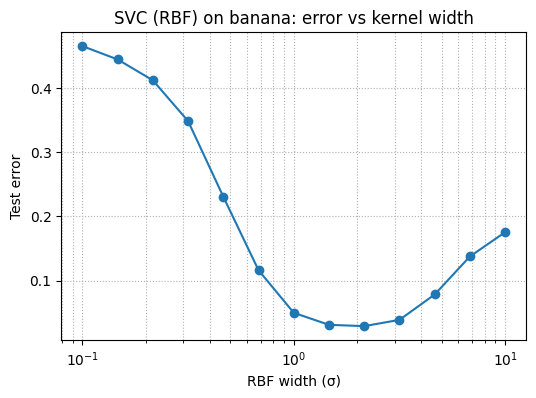

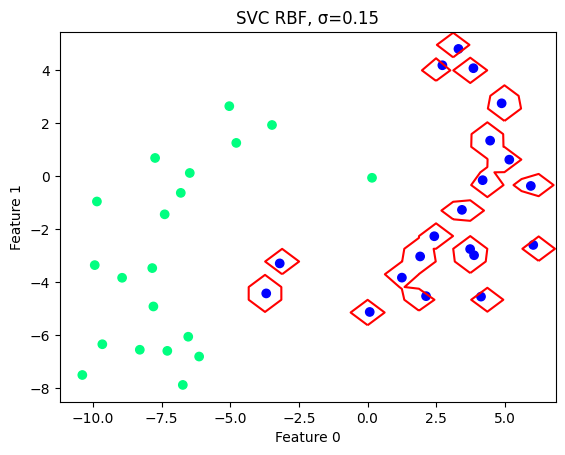

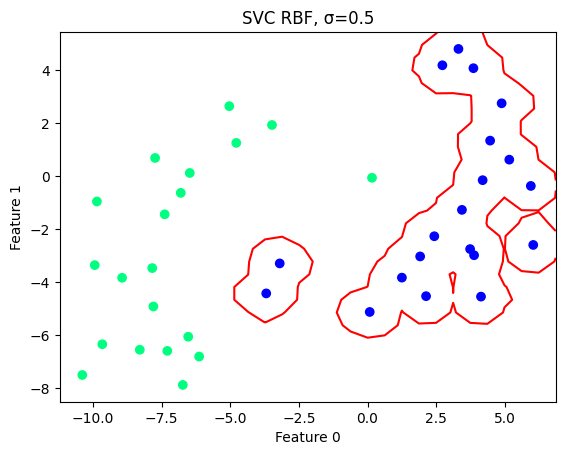

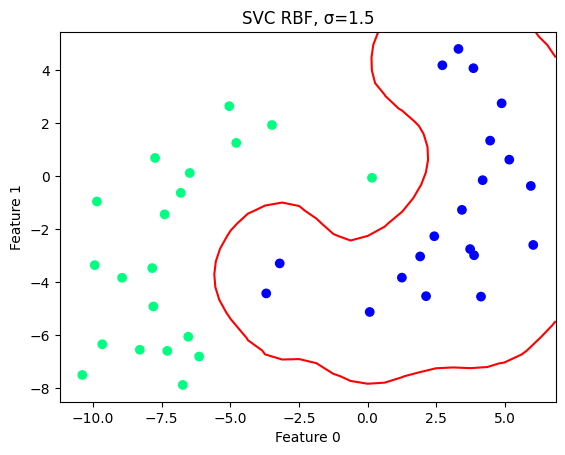

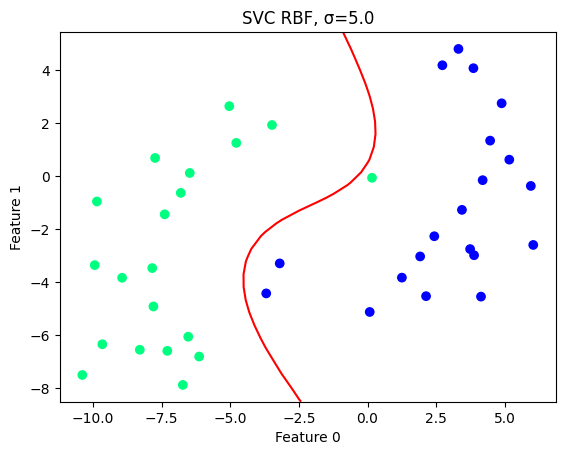

In [3]:
import numpy as np
import prtools as pr
import matplotlib.pyplot as plt

# 1) Data: small train set, large independent test set
a_train = pr.gendatb([20, 20])         # "banana" toy set
a_test  = pr.gendatb([2000, 2000])     # big test for stable estimates

# 2) Sweep RBF widths from small to large (0.1 → 10)
widths = np.logspace(-1, 1, 13)        # 0.1, 0.133..., ..., 10
C = 1.0                                 # tradeoff parameter; you can also try 0.1, 10

errs = []
for s in widths:
    # In PRTools: svc(dataset, (kernel_type, par, C))
    clf = pr.svc(a_train, ('rbf', s, C))   # trains the model
    # Evaluate test error; depending on version, either:
    err = pr.testc(a_test * clf)           # (preferred in recent prtools)
    # If your version expects testc(clf, a_test), use: err = pr.testc(clf, a_test)
    errs.append(float(err))

# 3) Plot error vs kernel width
plt.figure(figsize=(6,4))
plt.semilogx(widths, errs, marker='o')
plt.xlabel('RBF width (σ)')             # PRTools par is width σ
plt.ylabel('Test error')
plt.title('SVC (RBF) on banana: error vs kernel width')
plt.grid(True, which='both', ls=':')
plt.show()

# (Optional) Plot decision boundary for a few widths
for s in [0.15, 0.5, 1.5, 5.0]:
    clf = pr.svc(a_train, ('rbf', s, C))
    pr.scatterd(a_train)
    pr.plotc(clf)             # plots decision boundary
    plt.title(f'SVC RBF, σ={s}')
    plt.show()